## Árvores de regressão - exercícios 02

Este exercício será uma continuação do anterior, mesma base, mesmas variáveis - vamos tentar buscar a 'melhor árvore'.

A descrição das variáveis está abaixo:

| Variavel | Descrição|
|-|-|
|CRIM| taxa de crimes per-cápita da cidade | 
|ZN| proporção de terrenos residenciais zoneados para lotes com mais de 25.000 pés quadrados. |
|INDUS| proporção de acres de negócios não varejistas por cidade |
|CHAS |vale 1 se o terreno faz fronteira com o *Charles River*; 0 caso contrário |
|NOX| Concentração de óxido nítrico (em partes por 10 milhões) |
|RM| número médio de quartos por habitação |
|AGE| proporção de unidades ocupadas pelo proprietário construídas antes de 1940 |
|DIS| distâncias ponderadas até cinco centros de empregos de Boston |
|RAD| índice de acessibilidade a rodovias radiais |
|TAX| taxa de imposto sobre a propriedade de valor total por \\$10,000 |
|PTRATIO| razão pupilo-professor da cidade |
|B| $ 1000 (Bk - 0,63) ^ 2 $ onde Bk é a proporção de negros por cidade |
|LSTAT| \%status inferior da população |
|MEDV| (variável resposta) Valor mediano das casas ocupadas pelo proprietário em US $ 1.000|

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.metrics import mean_squared_error

boston = datasets.load_boston()
X = pd.DataFrame(boston.data, columns = boston.feature_names)
y = pd.DataFrame(boston.target, columns = ['MEDV'])

In [2]:
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [3]:
y.head()

,MEDV
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


### 1. Execute os passos do exercício anterior, até que você tenha uma árvore de regressão predizendo o valor do imóvel na base de treinamento.

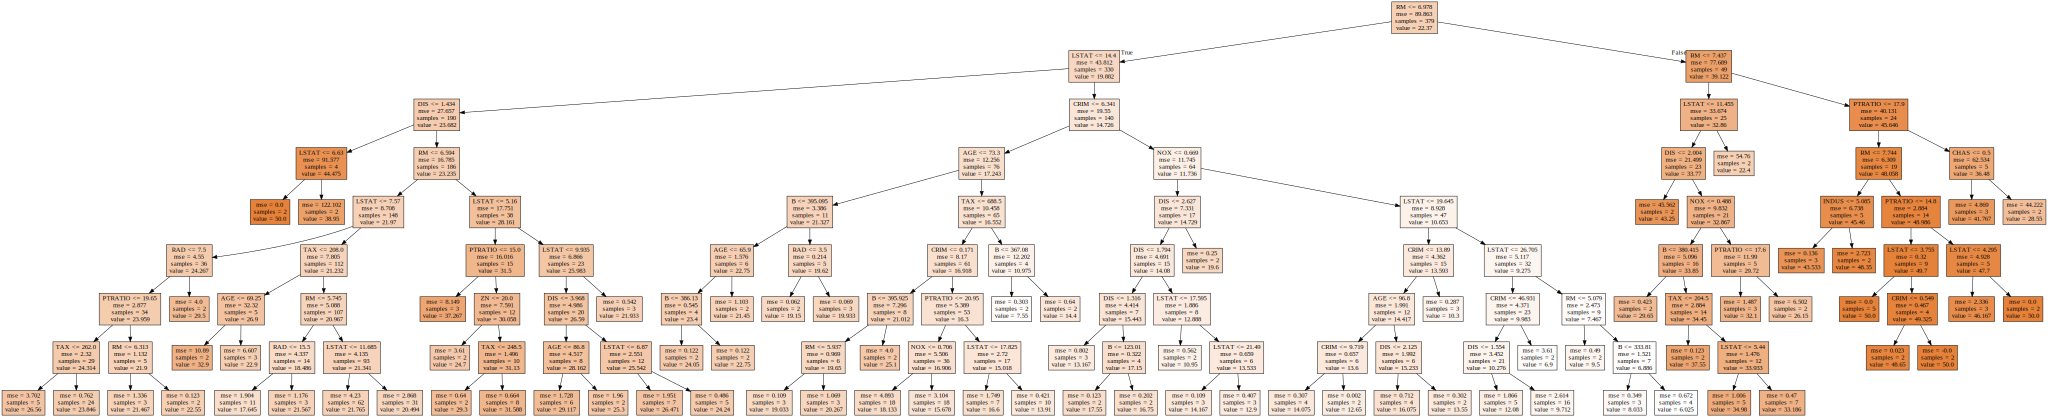

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2360873)
# Fit regression model
regr_1 = DecisionTreeRegressor(max_depth=8,min_samples_leaf=2)
regr_1.fit(X_train, y_train)

import graphviz

# DOT data
dot_data = tree.export_graphviz(regr_1, out_file=None, 
                                feature_names=X.columns,
                                filled=True)
graph = graphviz.Source(dot_data, format='png')
graph

### 2.  Calcule o caminho indicado pelos CCP-alfas dessa árvore.

In [5]:
path = regr_1.cost_complexity_pruning_path(X_train, y_train)
pd.DataFrame.from_dict(path)

,ccp_alphas,impurities
0,0.000000,3.630367
1,0.001689,3.632056
2,0.001943,3.633999
3,0.003716,3.637715
4,0.003740,3.645195
...,...,...
58,3.057105,21.188120
59,4.661131,25.849251
60,5.281704,31.130955
61,17.060611,48.191566


Text(0, 0.5, 'Impureza total das folhas')

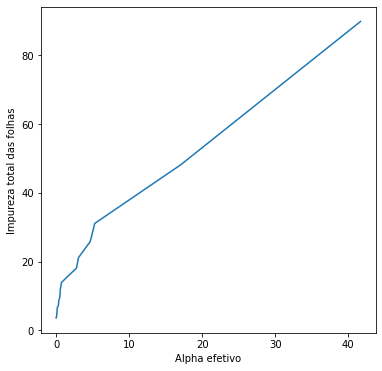

In [6]:
ccp_alphas, impurities = path.ccp_alphas, path.impurities

plt.figure(figsize=(6, 6))
plt.plot(ccp_alphas, impurities)
plt.xlabel("Alpha efetivo")
plt.ylabel("Impureza total das folhas")

### 3. Para cada valor de alpha obtido no item 2, treine uma árvore com o respectivo alfa, e guarde essa árvore em uma lista.

In [7]:
clfs = []

for ccp_alpha in ccp_alphas:
    clf = DecisionTreeRegressor(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)

Text(0, 0.5, 'Profundidade da árvore')

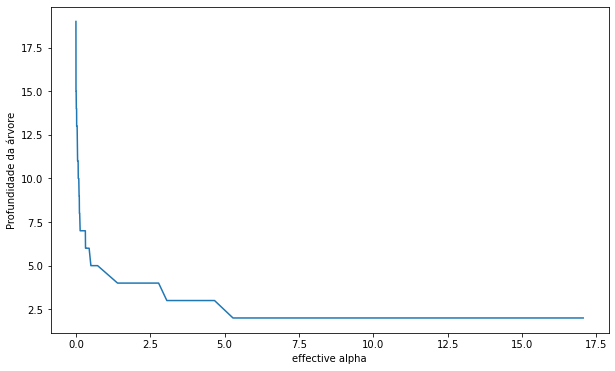

In [9]:
tree_depths = [clf.tree_.max_depth for clf in clfs]
plt.figure(figsize=(10,  6))
plt.plot(ccp_alphas[:-1], tree_depths[:-1])
plt.xlabel("effective alpha")
plt.ylabel("Profundidade da árvore")

### 4. Para cada árvore na lista, calcule o MSE da árvore.

In [ ]:
train_scores = [mean_squared_error(y_train , clf.predict(X_train)) for clf in clfs]
test_scores  = [mean_squared_error(y_test  , clf.predict(X_test )) for clf in clfs]

scores = list(zip(train_scores, test_scores))
# converte uma lista de tuplas num DataFrame
df_mse = pd.DataFrame(scores, columns=['train', 'test'])
df_mse

### 5. Monte um gráfico do MSE pelo alpha, escolha um valor de alpha perto do ponto de mínimo do MSE

In [ ]:
fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("MSE")
ax.set_title("MSE x alpha do conjunto de dados de treino e teste")
ax.plot(ccp_alphas[:-1], train_scores[:-1], marker='o', label="treino",
        drawstyle="steps-post")
ax.plot(ccp_alphas[:-1], test_scores[:-1], marker='o', label="teste",
        drawstyle="steps-post")
ax.legend()
plt.show()

### 6. Calcule o R-quadrado dessa árvore encontrada no item acima

In [ ]:
arvore_otm = DecisionTreeRegressor(random_state=0,ccp_alpha=2)
arvore_otm.fit(X_train, y_train)
print(f"Profundidade: {arvore_otm.tree_.max_depth}")
print(f"R² da base de testes: {arvore_otm.score(X_test, y_test):.2f}")      
print(f"MSE na base de testes: {mean_squared_error(y_test, arvore_otm.predict(X_test)):.2f}")      

### 7. Visualize esta árvore.

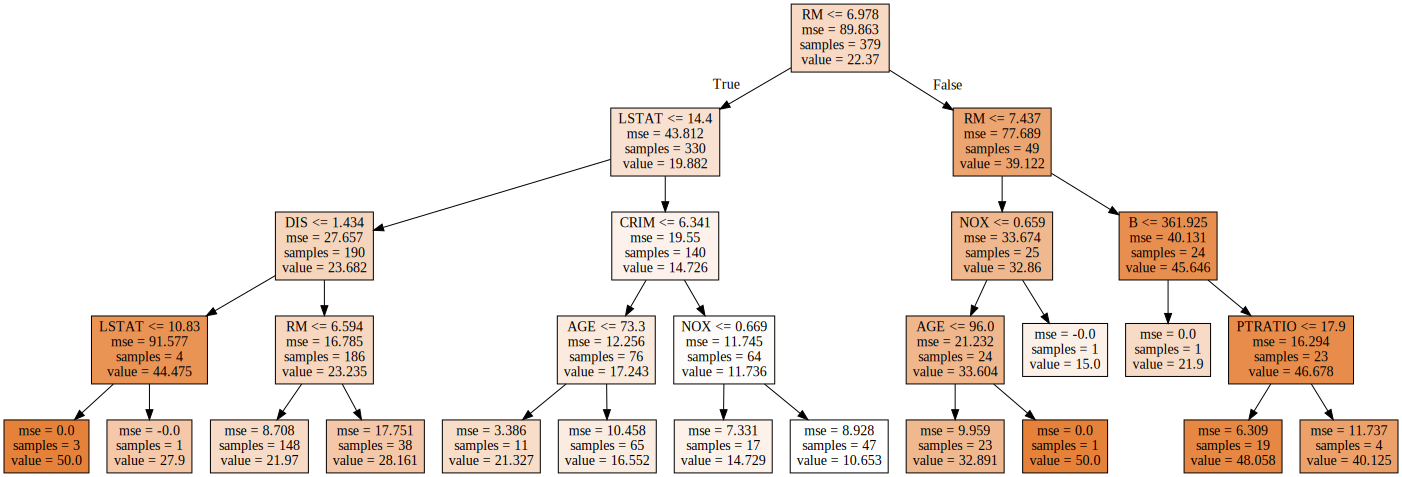

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2360873)
# Fit regression model
regr_2 = DecisionTreeRegressor(max_depth=4)#,min_samples_leaf=2)
regr_2.fit(X_train, y_train)

import graphviz

# DOT data
dot_data = tree.export_graphviz(regr_2, out_file=None, 
                                feature_names=X.columns,
                                filled=True)
graph = graphviz.Source(dot_data, format='png')
graph